In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

In [4]:
xs = np.arange(-5, 5, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [5]:
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

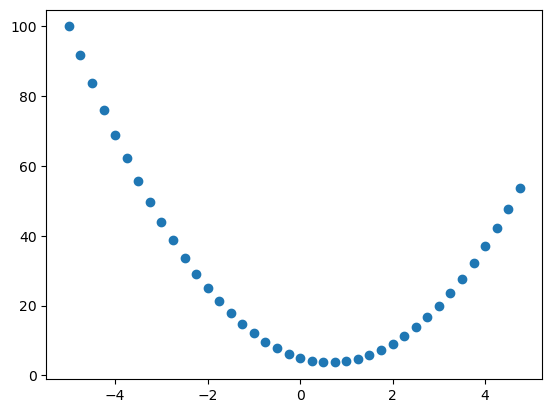

In [6]:
plt.scatter(xs, ys);

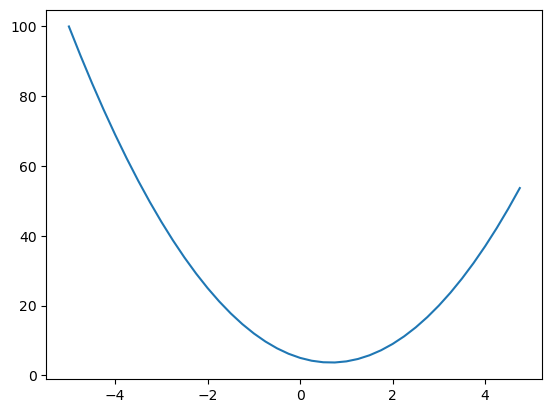

In [7]:
plt.plot(xs, ys);

In [8]:
x = 3.0
f(x)

20.0

In [9]:
h = 0.0001

In [10]:
f(x+h)

20.001400030000006

In [11]:
(f(x+h) - f(x))/h

14.000300000063248

In [12]:
x = -3.0
(f(x+h) - f(x))/h

-21.999700000066014

In [13]:
x = (2/3)
(f(x+h) - f(x))/h

0.0002999999981767587

In [14]:
def d(a, b ,c):
    return a * b + c

In [15]:
a = 2.0
b = - 3.0
c = 10
d(a, b, c)

4.0

In [16]:
(d(a+h, b, c) - d(a, b, c))/h

-3.000000000010772

In [17]:
(d(a, b+h, c) - d(a, b, c))/h

2.0000000000042206

In [18]:
(d(a, b, c+h) - d(a, b, c))/h

0.9999999999976694

In [19]:
class Value:

    def __init__(self, x):
        self.data = x

    def __repr__(self):
        return f"Value(data={self.data})"

In [20]:
a = Value(2.0)
a

Value(data=2.0)

In [21]:
#b = Value(3.0)
#a + b

In [22]:
class Value:

    def __init__(self, x):
        self.data = x

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):                  ###
        output = Value(self.data + other.data) ###
        return output                          ###

In [23]:
a = Value(2.0)
b = Value(3.0)
a + b # a.__add__(b)

Value(data=5.0)

In [24]:
a.__add__(b)

Value(data=5.0)

In [25]:
class Value:

    def __init__(self, x):
        self.data = x

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        output = Value(self.data + other.data)
        return output

    def __mul__(self, other):                  ###
        output = Value(self.data * other.data) ###
        return output                          ###

In [26]:
a = Value(2.0)
b = Value(-3.0)
a * b # a.__mul__(b)

Value(data=-6.0)

In [27]:
c = Value(10)
a * b + c #(a.__mul__(b)).__add__(c)

Value(data=4.0)

In [28]:
(a.__mul__(b)).__add__(c)

Value(data=4.0)

In [29]:
class Value:

    def __init__(self, x, children=()):   ###
        self.data = x
        self.prev = children              ###

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        output = Value(self.data + other.data, (self, other)) ###
        return output

    def __mul__(self, other):
        output = Value(self.data * other.data, (self, other)) ###
        return output

In [30]:
d = a * b + c 

In [31]:
d.prev

(Value(data=-6.0), Value(data=10))

In [32]:
class Value:

    def __init__(self, x, children=(), operation=''):   ###
        self.data = x
        self.prev = children
        self.op = operation                             ###

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        output = Value(self.data + other.data, (self, other), '+') ###
        return output

    def __mul__(self, other):
        output = Value(self.data * other.data, (self, other), '*') ###
        return output

In [33]:
d = a * b + c

In [34]:
d.op

'+'

In [35]:
d.prev

(Value(data=-6.0), Value(data=10))

In [36]:
d

Value(data=4.0)

In [37]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v.prev :
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ data %.4f }" % (n.data, ), shape='record')
        if n.op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n.op, label = n.op)
            # and connect this node to it
            dot.edge(uid + n.op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2.op)

    return dot


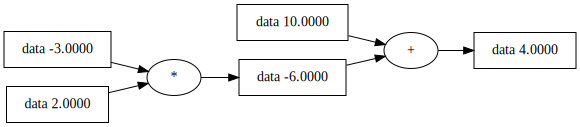

In [38]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10)
d = a * b + c

draw_dot(d)

In [39]:
class Value:

    def __init__(self, x, children=(), operation='', label=''):  ###
        self.data = x
        self.prev = children
        self.op = operation
        self.label = label                                       ###

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        output = Value(self.data + other.data, (self, other), '+')
        return output

    def __mul__(self, other):
        output = Value(self.data * other.data, (self, other), '*')
        return output

In [40]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v.prev :
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f }" % (n.label, n.data), shape='record')
        if n.op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n.op, label = n.op)
            # and connect this node to it
            dot.edge(uid + n.op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2.op)

    return dot

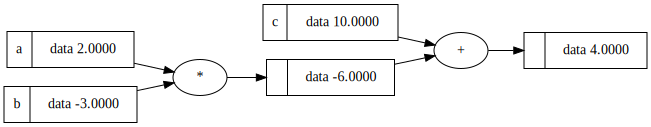

In [41]:
a = Value(2.0, label='a')
b = Value(-3.0, label = 'b')
c = Value(10, label= 'c')
d = a * b + c

draw_dot(d)

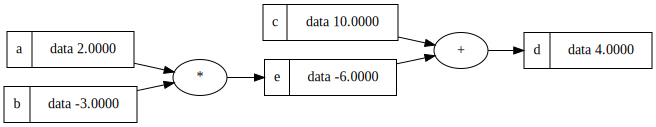

In [42]:
e = a * b; e.label = 'e' 
d = e + c; d.label = 'd'

draw_dot(d)

In [43]:
f = Value(-2.0, label='f')
L = d * f; L.label='L'
L

Value(data=-8.0)

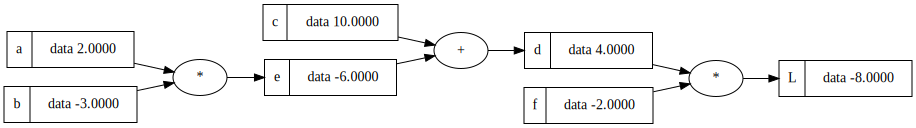

In [44]:
draw_dot(L)

In [45]:
class Value:

    def __init__(self, x, children=(), operation='', label=''):
        self.data = x
        self.prev = children
        self.op = operation
        self.label = label
        self.grad = 0.0                                         ###

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        output = Value(self.data + other.data, (self, other), '+')
        return output

    def __mul__(self, other):
        output = Value(self.data * other.data, (self, other), '*')
        return output

In [46]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v.prev :
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n.op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n.op, label = n.op)
            # and connect this node to it
            dot.edge(uid + n.op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2.op)

    return dot

In [47]:
a = Value(2.0, label='a')
b = Value(-3.0, label = 'b')
c = Value(10, label= 'c')
e = a * b; e.label = 'e' 
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label='L'
L

Value(data=-8.0)

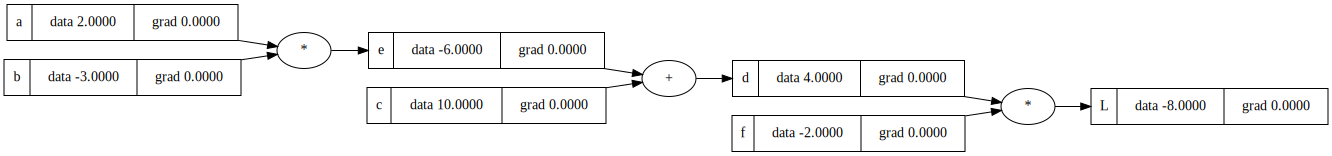

In [48]:
draw_dot(L)

In [49]:
h

0.0001

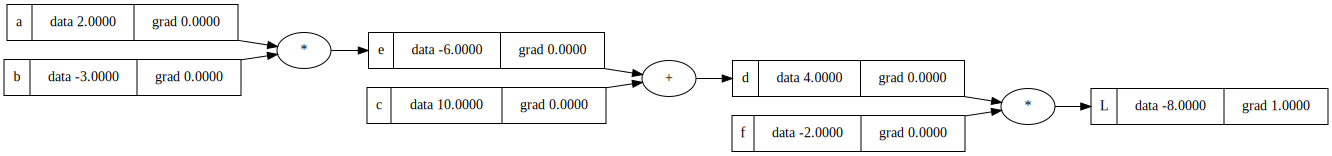

In [50]:
L.grad = 1

draw_dot(L)

In [51]:
def lol():
    a = Value(2.0, label='a')
    b = Value(-3.0, label = 'b')
    c = Value(10, label= 'c')
    e = a * b; e.label = 'e' 
    d = e + c; d.label = 'd'
    d.data += h
    f = Value(-2.0, label='f')
    L1 = d * f; L.label='L'
    return (L1.data - L.data)/h

lol()

-1.9999999999953388

In [52]:
d.grad = -2

In [53]:
def lol():
    a = Value(2.0, label='a')
    b = Value(-3.0, label = 'b')
    c = Value(10, label= 'c')
    e = a * b; e.label = 'e' 
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    f.data += h
    L1 = d * f; L.label='L'
    return (L1.data - L.data)/h 

lol()

3.9999999999995595

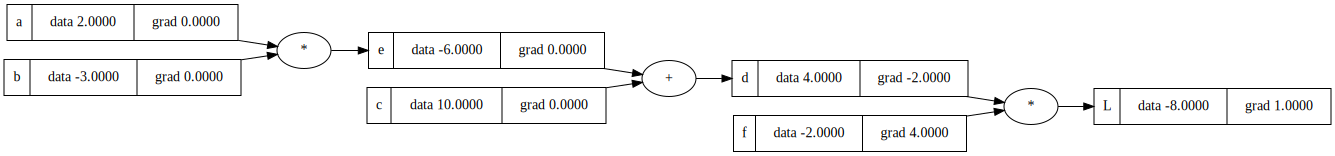

In [54]:
f.grad = 4

draw_dot(L)

In [55]:
def lol():
    a = Value(2.0, label='a')
    b = Value(-3.0, label = 'b')
    c = Value(10, label= 'c')
    e = a * b; e.label = 'e'
    e.data += h
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L1 = d * f; L.label='L'
    return (L1.data - L.data)/h 

lol()

-1.9999999999953388

In [56]:
e.grad = -2

In [57]:
def lol():
    a = Value(2.0, label='a')
    b = Value(-3.0, label = 'b')
    c = Value(10, label= 'c')
    c.data += h
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L1 = d * f; L.label='L'
    return (L1.data - L.data)/h 

lol()

-1.9999999999953388

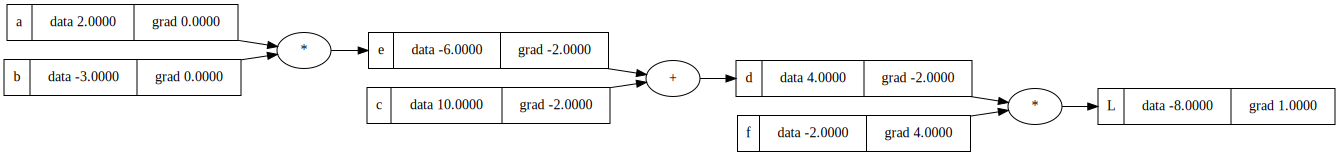

In [58]:
c.grad = -2

draw_dot(L)

In [59]:
def lol():
    a = Value(2.0, label='a')
    b = Value(-3.0, label = 'b')
    b.data += h
    c = Value(10, label= 'c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L1 = d * f; L.label='L'
    return (L1.data - L.data)/h 

lol()

-4.000000000008441

In [60]:
b.grad = -4

In [61]:
def lol():
    a = Value(2.0, label='a')
    a.data += h
    b = Value(-3.0, label = 'b')
    c = Value(10, label= 'c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L1 = d * f; L.label='L'
    return (L1.data - L.data)/h 

lol()

6.000000000021544

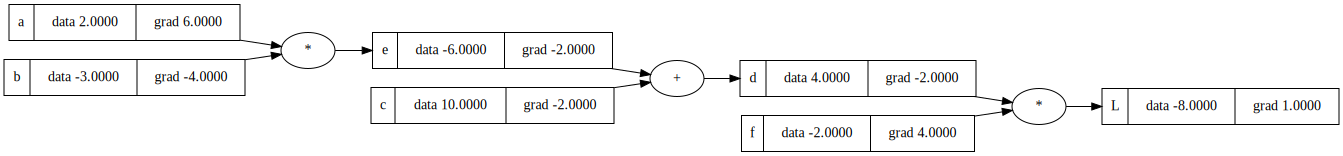

In [62]:
a.grad = 6

draw_dot(L)

In [63]:
xs = np.arange(-5, 5, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [64]:
ys = np.tanh(xs)
ys

array([-0.9999092 , -0.99985031, -0.99975321, -0.99959315, -0.9993293 ,
       -0.99889444, -0.9981779 , -0.99699764, -0.99505475, -0.99185972,
       -0.9866143 , -0.97802611, -0.96402758, -0.94137554, -0.90514825,
       -0.84828364, -0.76159416, -0.63514895, -0.46211716, -0.24491866,
        0.        ,  0.24491866,  0.46211716,  0.63514895,  0.76159416,
        0.84828364,  0.90514825,  0.94137554,  0.96402758,  0.97802611,
        0.9866143 ,  0.99185972,  0.99505475,  0.99699764,  0.9981779 ,
        0.99889444,  0.9993293 ,  0.99959315,  0.99975321,  0.99985031])

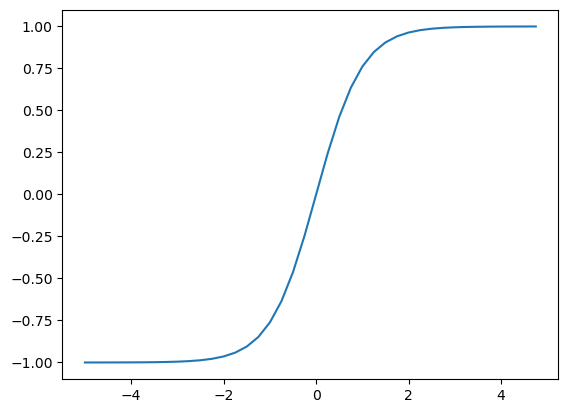

In [65]:
plt.plot(xs, ys);

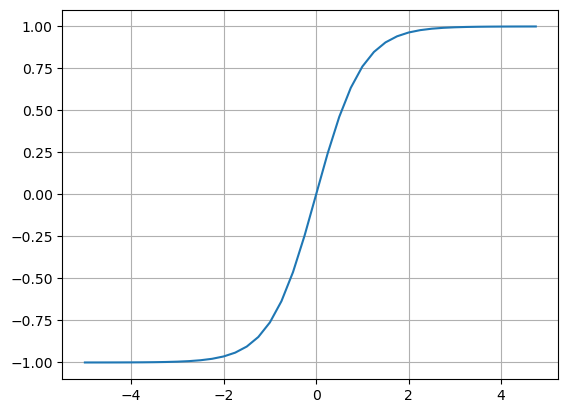

In [66]:
plt.plot(xs, ys); plt.grid();

In [67]:
#inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights w1, w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias
b = Value(6.7, label = 'b')

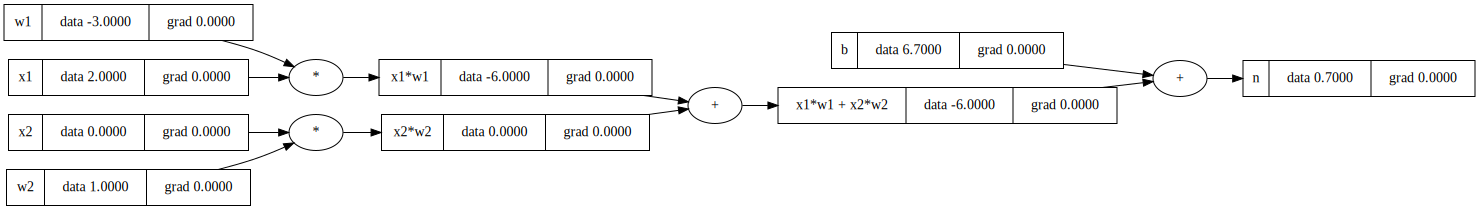

In [68]:
# x1*w1 + x2*w2 + b  
a1 = x1 * w1; a1.label = 'x1*w1'
a2 = x2 * w2; a2.label = 'x2*w2'
s = a1 + a2; s.label = 'x1*w1 + x2*w2'
n = s + b; n.label = 'n'

draw_dot(n)

In [69]:
class Value:

    def __init__(self, x, children=(), operation='', label=''):
        self.data = x
        self.prev = children
        self.op = operation
        self.label = label
        self.grad = 0.0

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        output = Value(self.data + other.data, (self, other), '+')
        return output

    def __mul__(self, other):
        output = Value(self.data * other.data, (self, other), '*')
        return output

    def tanh(self):                                         ###
        return Value(np.tanh(self.data), (self, ), 'tanh')  ###

In [70]:
#inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights w1, w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias
b = Value(8, label = 'b')

# x1*w1 + x2*w2 + b  
a1 = x1 * w1; a1.label = 'x1*w1'
a2 = x2 * w2; a2.label = 'x2*w2'
s = a1 + a2; s.label = 'x1*w1 + x2*w2'
n = s + b; n.label = 'n'

o = n.tanh(); o.label = 'output'
o

Value(data=0.9640275800758169)

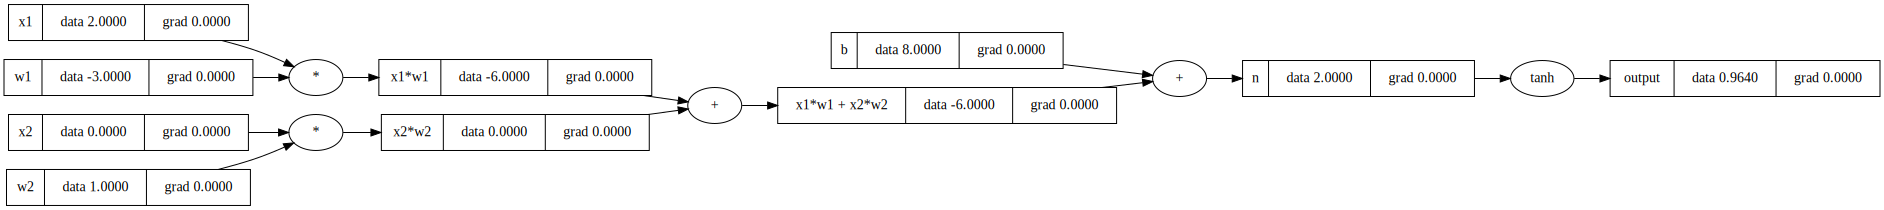

In [71]:
draw_dot(o)

In [72]:
#inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights w1, w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b  
a1 = x1 * w1; a1.label = 'x1*w1'
a2 = x2 * w2; a2.label = 'x2*w2'
s = a1 + a2; s.label = 'x1*w1 + x2*w2'
n = s + b; n.label = 'n'

o = n.tanh(); o.label = 'output'
o

Value(data=0.7071067811865476)

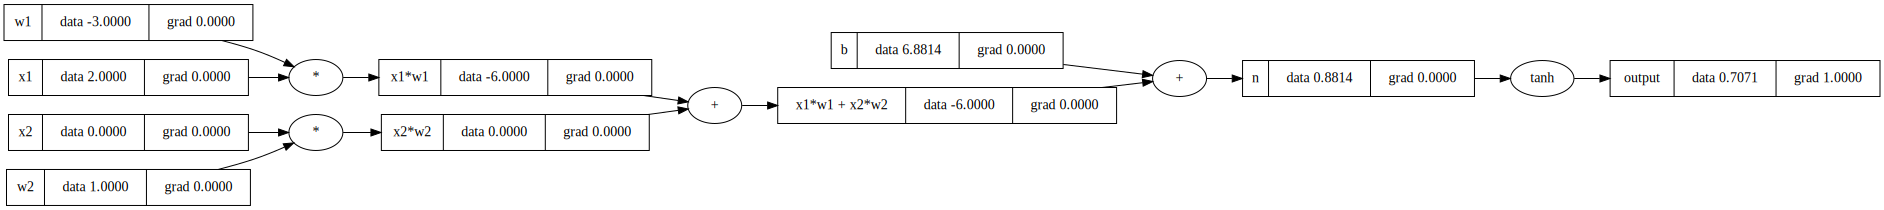

In [73]:
o.grad = 1.0

draw_dot(o)

In [74]:
# d tanh(n) / d n = 1 - tanh(n)**2   

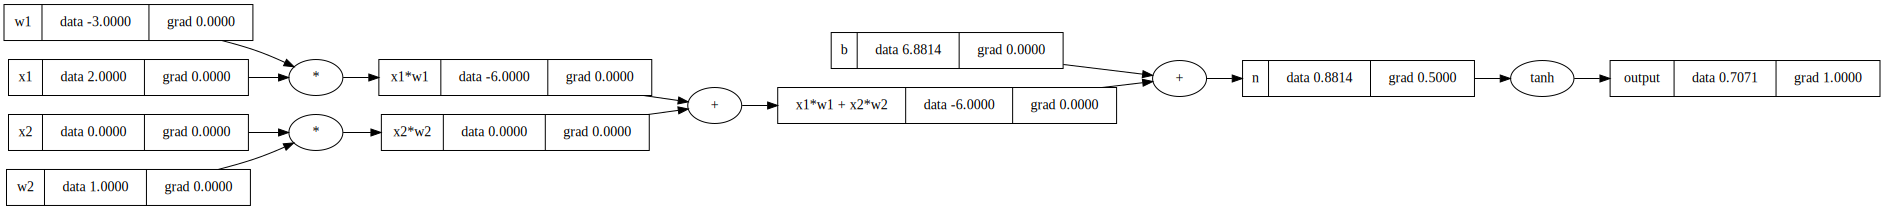

In [75]:
n.grad = 1 - o.data**2

draw_dot(o)

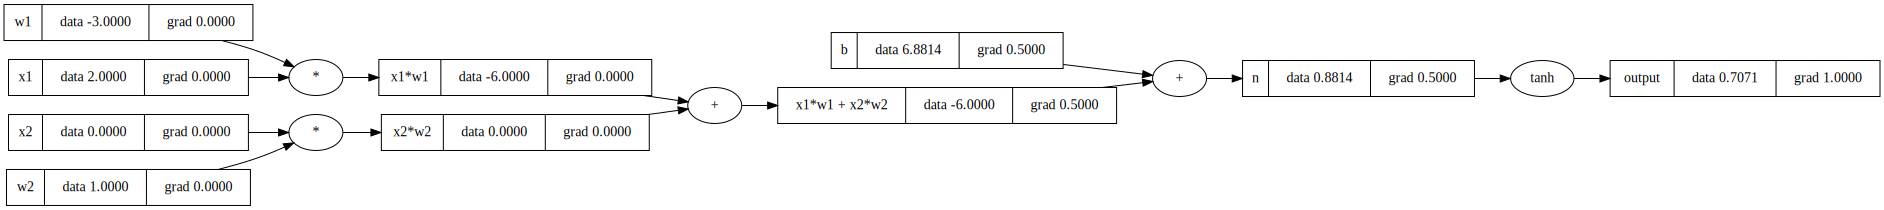

In [76]:
s.grad = 0.5
b.grad = 0.5 

draw_dot(o)

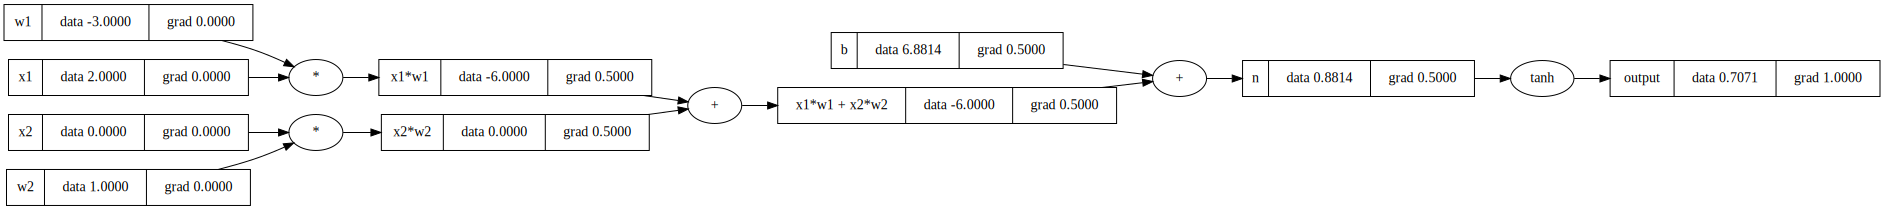

In [77]:
a1.grad = 0.5
a2.grad = 0.5

draw_dot(o)

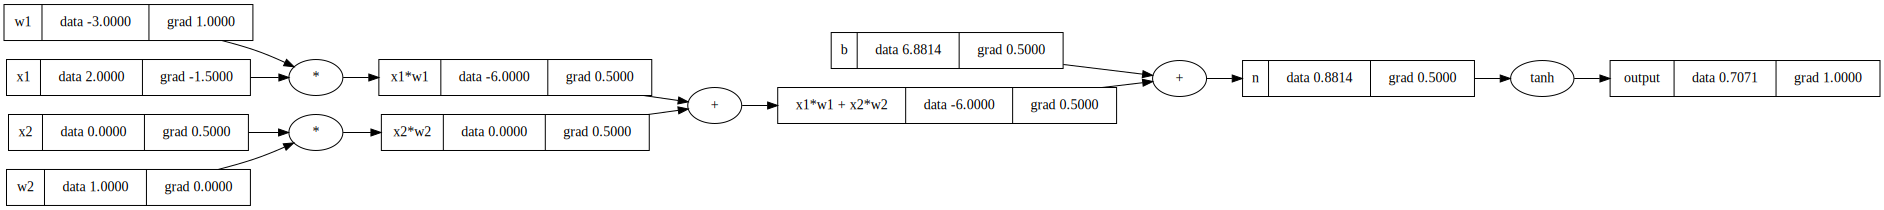

In [78]:
w1.grad = x1.data * a1.grad
x1.grad = w1.data * a1.grad
w2.grad = x2.data * a2.grad
x2.grad = w2.data * a2.grad

draw_dot(o)

In [79]:
class Value:

    def __init__(self, x, children=(), operation='', label=''):
        self.data = x
        self.prev = children
        self.op = operation
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None                 ###
        
#       def do_nothing():
#           return None
#       self._backward = do_nothing

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        output = Value(self.data + other.data, (self, other), '+')
        
        def _backward():                              ###
            self.grad = 1.0 * output.grad             ###
            other.grad = 1.0 * output.grad            ###

        output._backward = _backward                  ###
        return output

    def __mul__(self, other):
        output = Value(self.data * other.data, (self, other), '*')

        def _backward():                              ###
            self.grad = other.data * output.grad      ###
            other.grad = self.data * output.grad      ###

        output._backward = _backward                  ###
        return output

    def tanh(self):
        output = Value(np.tanh(self.data), (self, ), 'tanh')

        def _backward():                                             ###
            self.grad = (1 - np.tanh(self.data)**2 ) * output.grad   ###

        output._backward = _backward                                 ###
        return output

In [80]:
#inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights w1, w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias
b = Value(6.8813735870195432, label = 'b')

# x1*w1 + x2*w2 + b  
a1 = x1 * w1; a1.label = 'x1*w1'
a2 = x2 * w2; a2.label = 'x2*w2'
s = a1 + a2; s.label = 'x1*w1 + x2*w2'
n = s + b; n.label = 'n'

o = n.tanh(); o.label = 'output'
o

Value(data=0.7071067811865476)

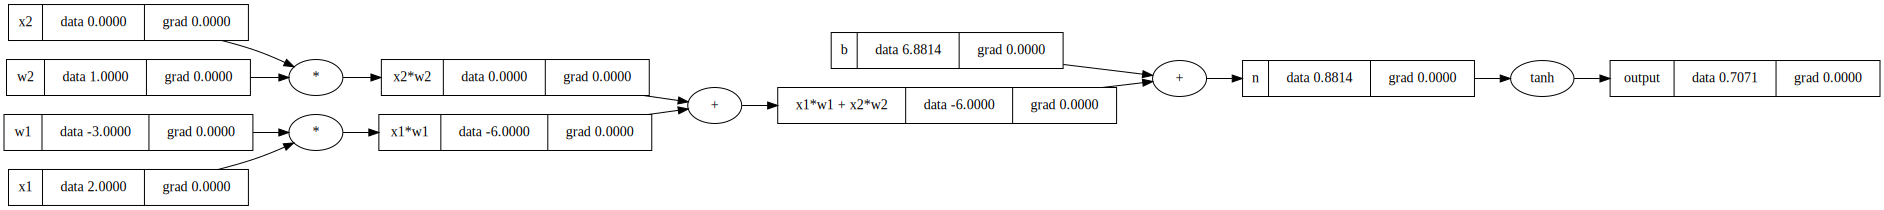

In [81]:
draw_dot(o)

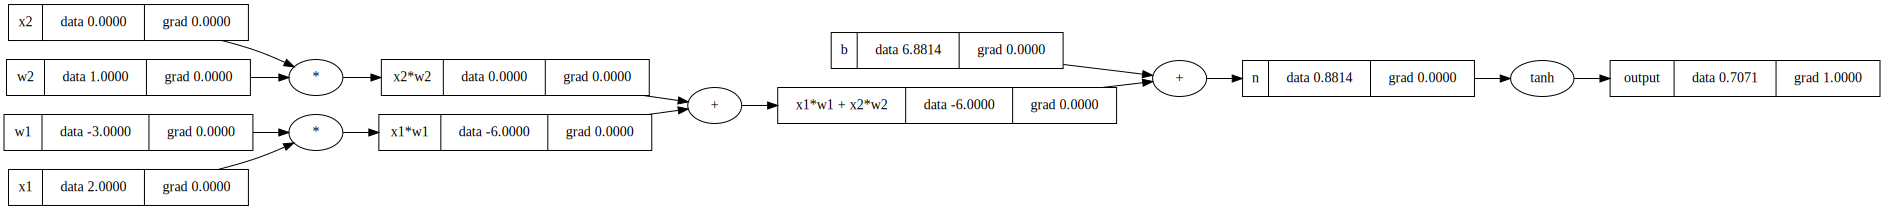

In [82]:
o.grad = 1.0

draw_dot(o)

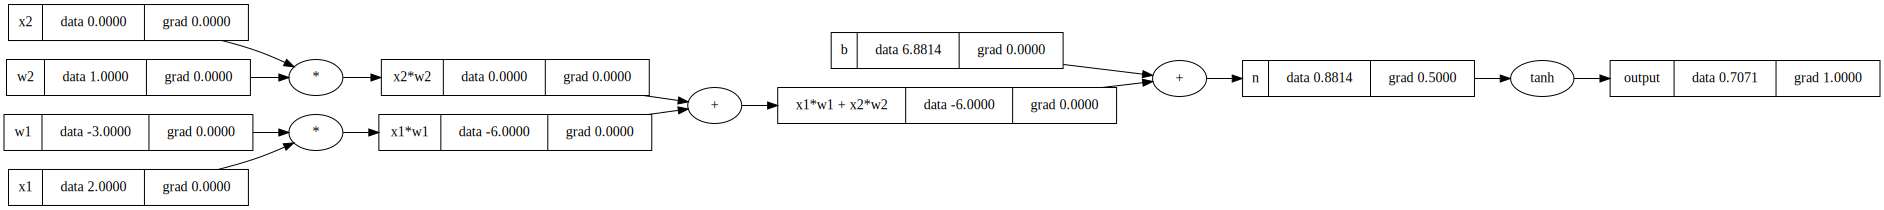

In [83]:
o._backward()

draw_dot(o)

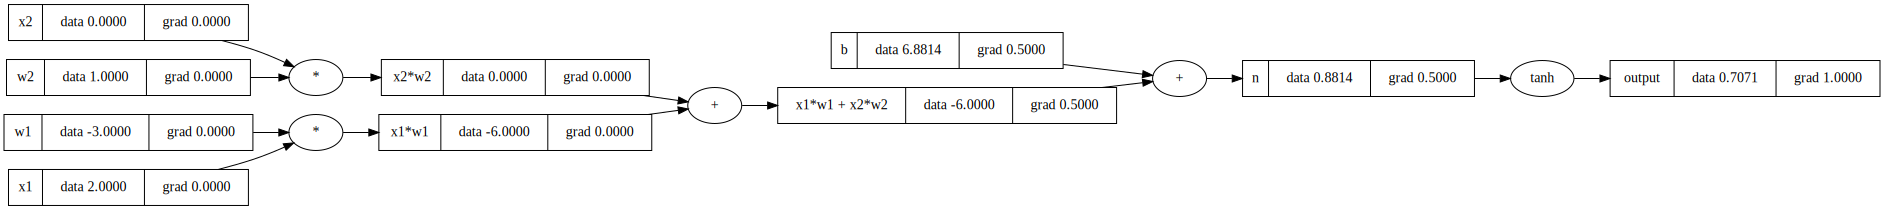

In [84]:
n._backward()

draw_dot(o)

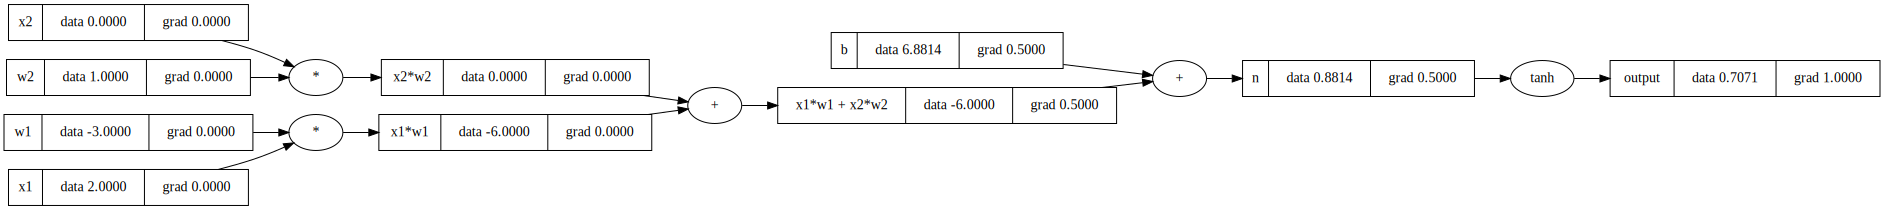

In [85]:
b._backward()

draw_dot(o)

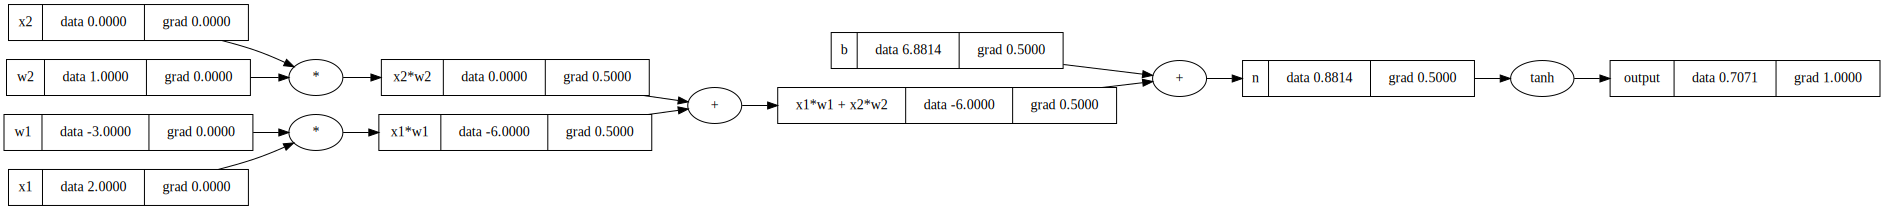

In [86]:
s._backward()

draw_dot(o)

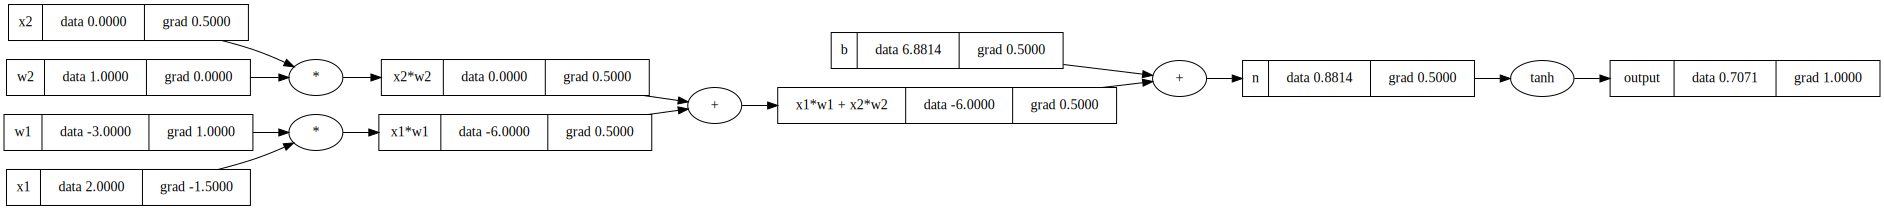

In [87]:
a1._backward()
a2._backward()

draw_dot(o)

In [88]:
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v.prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

[Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=6.881373587019543),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

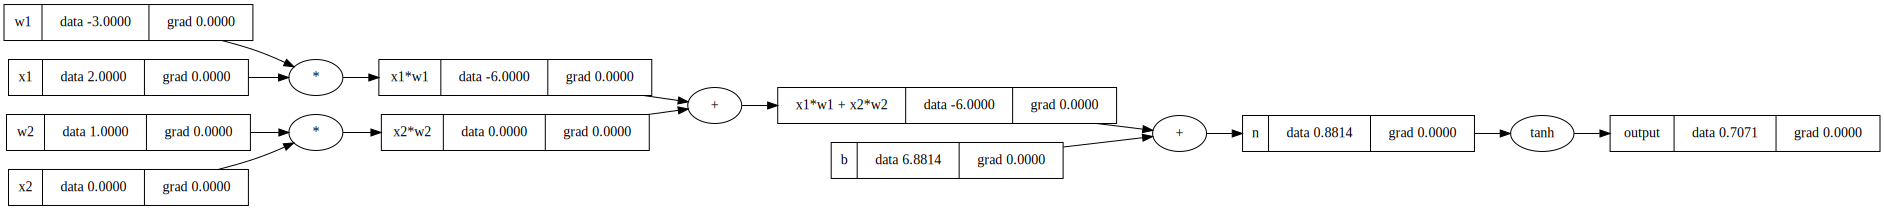

In [89]:
#inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights w1, w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias
b = Value(6.8813735870195432, label = 'b')

# x1*w1 + x2*w2 + b  
a1 = x1 * w1; a1.label = 'x1*w1'
a2 = x2 * w2; a2.label = 'x2*w2'
s = a1 + a2; s.label = 'x1*w1 + x2*w2'
n = s + b; n.label = 'n'

o = n.tanh(); o.label = 'output'
draw_dot(o)

In [90]:
o.grad = 1.0

topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v.prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

for node in reversed(topo):
    node._backward()

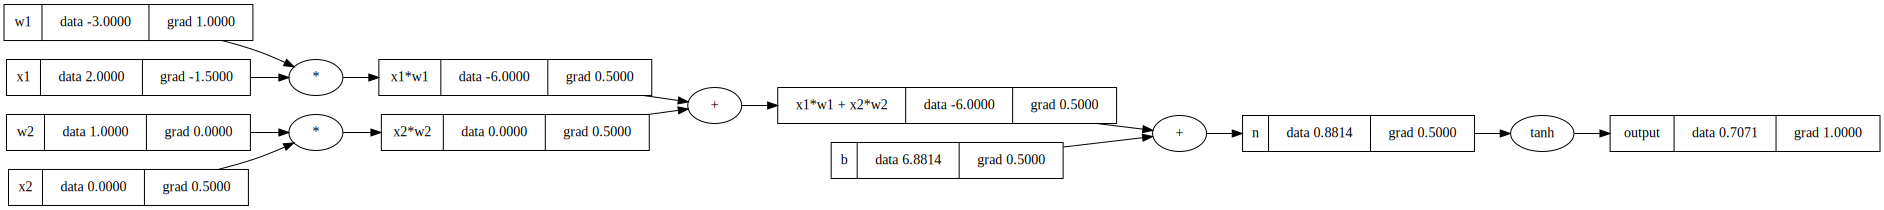

In [91]:
draw_dot(o)

In [92]:
class Value:

    def __init__(self, x, children=(), operation='', label=''):
        self.data = x
        self.prev = children
        self.op = operation
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        output = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad = 1.0 * output.grad
            other.grad = 1.0 * output.grad

        output._backward = _backward
        return output

    def __mul__(self, other):
        output = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad = other.data * output.grad
            other.grad = self.data * output.grad

        output._backward = _backward
        return output

    def tanh(self):
        output = Value(np.tanh(self.data), (self, ), 'tanh')

        def _backward():
            self.grad = (1 - np.tanh(self.data)**2 ) * output.grad

        output._backward = _backward
        return output

    def backward(self):                            ###
        
        topo = []                                  ###
        visited = set()                            ###
        def build_topo(v):                         ###
            if v not in visited:                   ###
                visited.add(v)                     ###
                for child in v.prev:               ###
                    build_topo(child)              ### 
                topo.append(v)                     ###

        build_topo(self)                           ###
        self.grad = 1.0                            ###
        for node in reversed(topo):                ###
            node._backward()                       ###

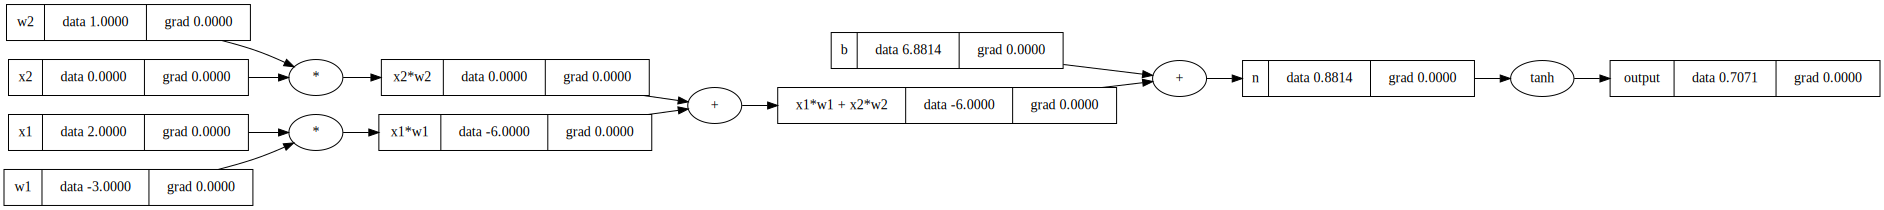

In [93]:
#inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights w1, w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias
b = Value(6.8813735870195432, label = 'b')

# x1*w1 + x2*w2 + b  
a1 = x1 * w1; a1.label = 'x1*w1'
a2 = x2 * w2; a2.label = 'x2*w2'
s = a1 + a2; s.label = 'x1*w1 + x2*w2'
n = s + b; n.label = 'n'

o = n.tanh(); o.label = 'output'
draw_dot(o)

In [94]:
o.backward()

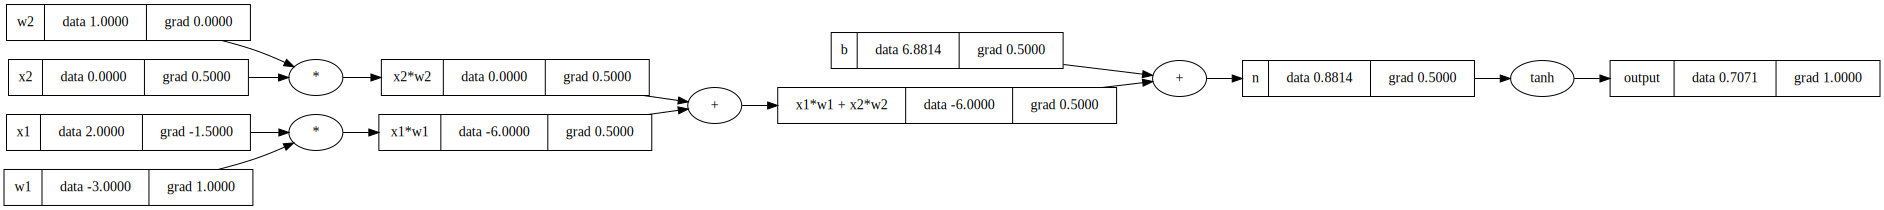

In [95]:
draw_dot(o)

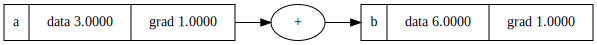

In [96]:
a = Value(3.0, label = 'a')
b = a + a; b.label = 'b'

b.backward()
draw_dot(b)

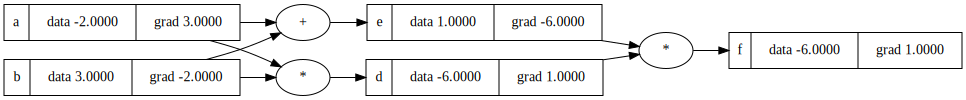

In [97]:
a = Value(-2.0, label = 'a')
b = Value(3.0, label = 'b')
d = a * b; d.label = 'd'
e = a + b; e.label = 'e'
f = d * e; f.label = 'f'

f.backward()
draw_dot(f)

In [98]:
class Value:

    def __init__(self, x, children=(), operation='', label=''):
        self.data = x
        self.prev = children
        self.op = operation
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        output = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad += 1.0 * output.grad      ###
            other.grad += 1.0 * output.grad     ###

        output._backward = _backward
        return output

    def __mul__(self, other):
        output = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * output.grad   ###
            other.grad += self.data * output.grad   ###

        output._backward = _backward
        return output

    def tanh(self):
        output = Value(np.tanh(self.data), (self, ), 'tanh')

        def _backward():
            self.grad += (1 - np.tanh(self.data)**2 ) * output.grad ###

        output._backward = _backward
        return output

    def backward(self):
        
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v.prev:
                    build_topo(child)
                topo.append(v)
        
        build_topo(self)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

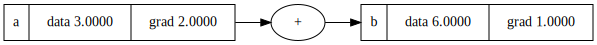

In [99]:
a = Value(3.0, label = 'a')
b = a + a; b.label = 'b'

b.backward()
draw_dot(b)

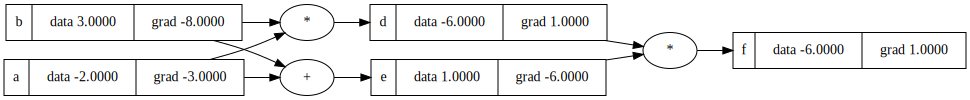

In [100]:
a = Value(-2.0, label = 'a')
b = Value(3.0, label = 'b')
d = a * b; d.label = 'd'
e = a + b; e.label = 'e'
f = d * e; f.label = 'f'

f.backward()
draw_dot(f)